In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
%matplotlib inline

import seaborn as sns

In [2]:
file_path = r'C:\Users\dell\Desktop\MyDocs\Docs\MK\most-visited-countries-2024.csv'
df = pd.read_csv(file_path)

In [3]:
def df_info(df):
    print(f"Data Shape: {df.shape}")
    df_chack = pd.DataFrame(df.dtypes, columns=['dtypes'])
    df_chack = df_chack.reset_index()
    df_chack['name'] = df_chack['index']
    df_chack = df_chack[['name', 'dtypes']]
    df_chack['isnull'] = df.isnull().sum().values
    df_chack['% null'] = round((df_chack['isnull']/len(df))*100,2)
    df_chack['num_unique'] = df.nunique().values
    df_chack['first_value'] = df.values[0]
    return df_chack

In [4]:
df_info(df)

Data Shape: (203, 6)


,name,dtypes,isnull,% null,num_unique,first_value
0,country,object,0,0.00,203,India
1,MostVisited_NumOfArrivalsPredictive_Millions_2024,float64,153,75.37,47,17.9
2,MostVisited_NumOfArrivals_Millions_2023,float64,154,75.86,47,NaN
3,MostVisited_NumOfArrivals_Millions_2022,float64,183,90.15,20,NaN
4,MostVisited_NumOfArrivals_WorldBank,float64,1,0.49,198,17914000.0
5,MostVisited_DataYear_WorldBank,float64,1,0.49,12,2019.0


In [5]:
df.hist(figsize=(10,8))

array([[<Axes: title={'center': 'MostVisited_NumOfArrivalsPredictive_Millions_2024'}>,
        <Axes: title={'center': 'MostVisited_NumOfArrivals_Millions_2023'}>],
       [<Axes: title={'center': 'MostVisited_NumOfArrivals_Millions_2022'}>,
        <Axes: title={'center': 'MostVisited_NumOfArrivals_WorldBank'}>],
       [<Axes: title={'center': 'MostVisited_DataYear_WorldBank'}>,
        <Axes: >]], dtype=object)

In [6]:
df.plot(kind='box', subplots=True, layout=(2,3), figsize=(12,8))

MostVisited_NumOfArrivalsPredictive_Millions_2024       Axes(0.125,0.53;0.227941x0.35)
MostVisited_NumOfArrivals_Millions_2023              Axes(0.398529,0.53;0.227941x0.35)
MostVisited_NumOfArrivals_Millions_2022              Axes(0.672059,0.53;0.227941x0.35)
MostVisited_NumOfArrivals_WorldBank                     Axes(0.125,0.11;0.227941x0.35)
MostVisited_DataYear_WorldBank                       Axes(0.398529,0.11;0.227941x0.35)
dtype: object

In [7]:
df_arrivals = df[['country','MostVisited_NumOfArrivals_Millions_2022', 'MostVisited_NumOfArrivals_Millions_2023']]

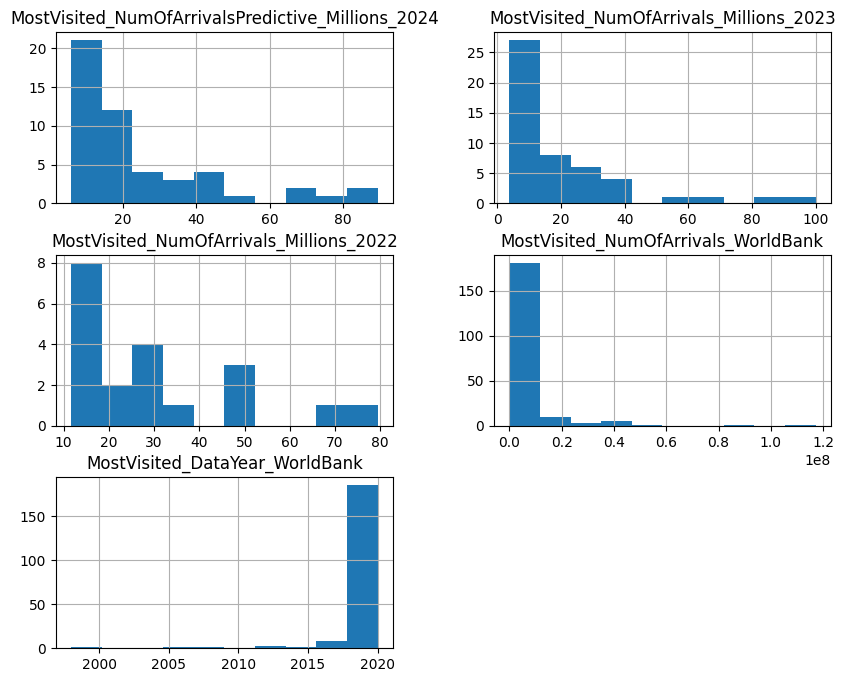

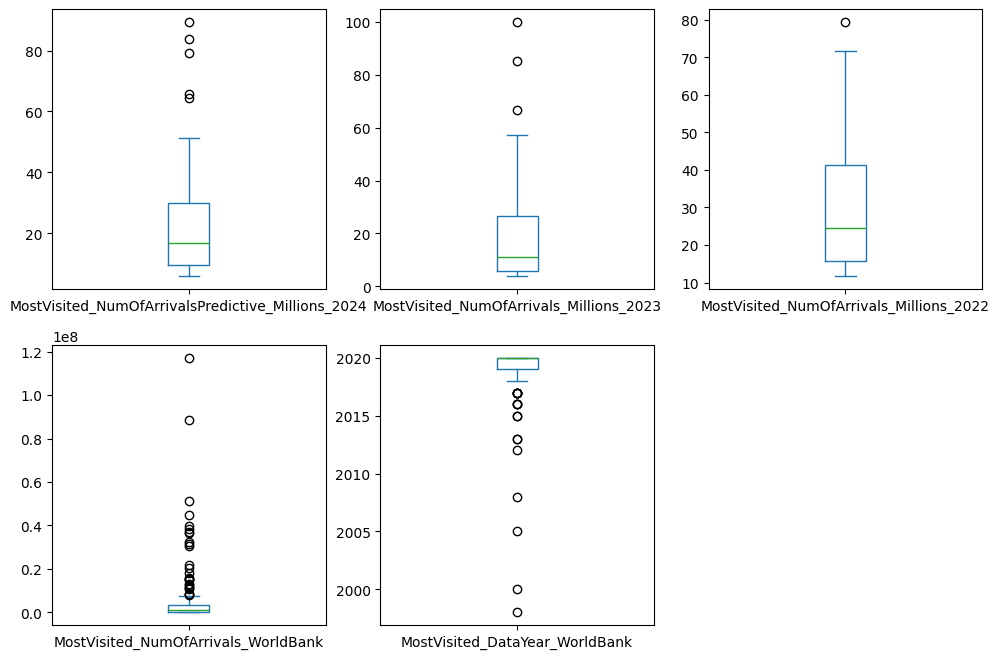

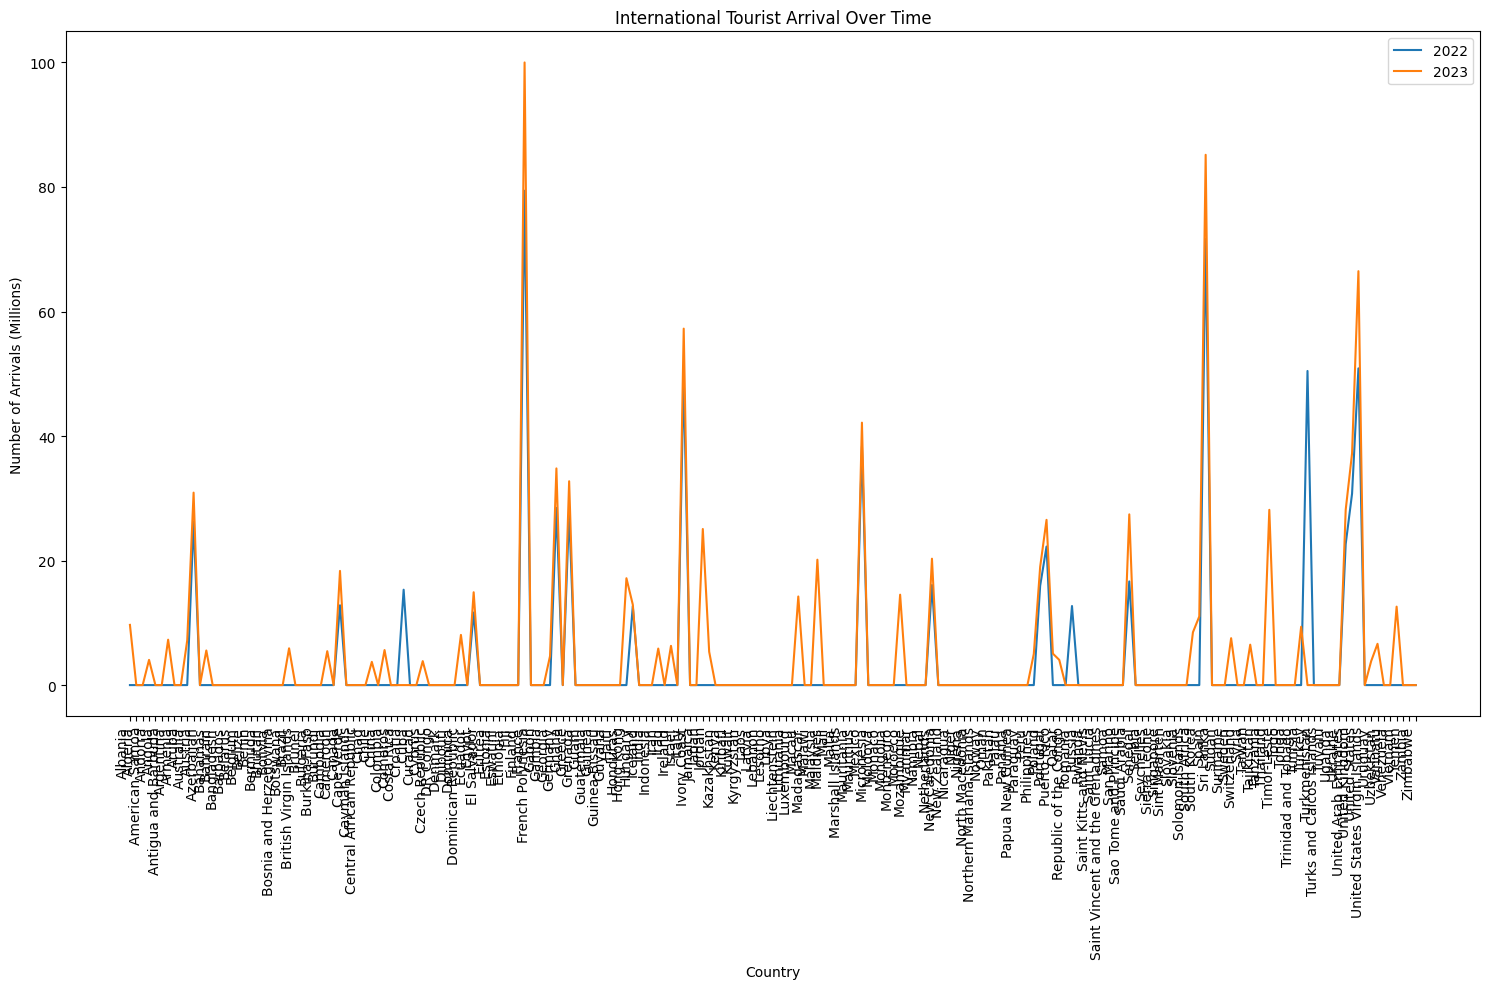

In [8]:
import matplotlib.pyplot as plt

yearly_arrivals = df_arrivals.groupby('country').sum()


plt.figure(figsize=(15, 10))
plt.plot(yearly_arrivals.index, yearly_arrivals['MostVisited_NumOfArrivals_Millions_2022'], label='2022')
plt.plot(yearly_arrivals.index, yearly_arrivals['MostVisited_NumOfArrivals_Millions_2023'], label='2023')
plt.xlabel('Country')
plt.ylabel('Number of Arrivals (Millions)')
plt.title('International Tourist Arrival Over Time')  
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

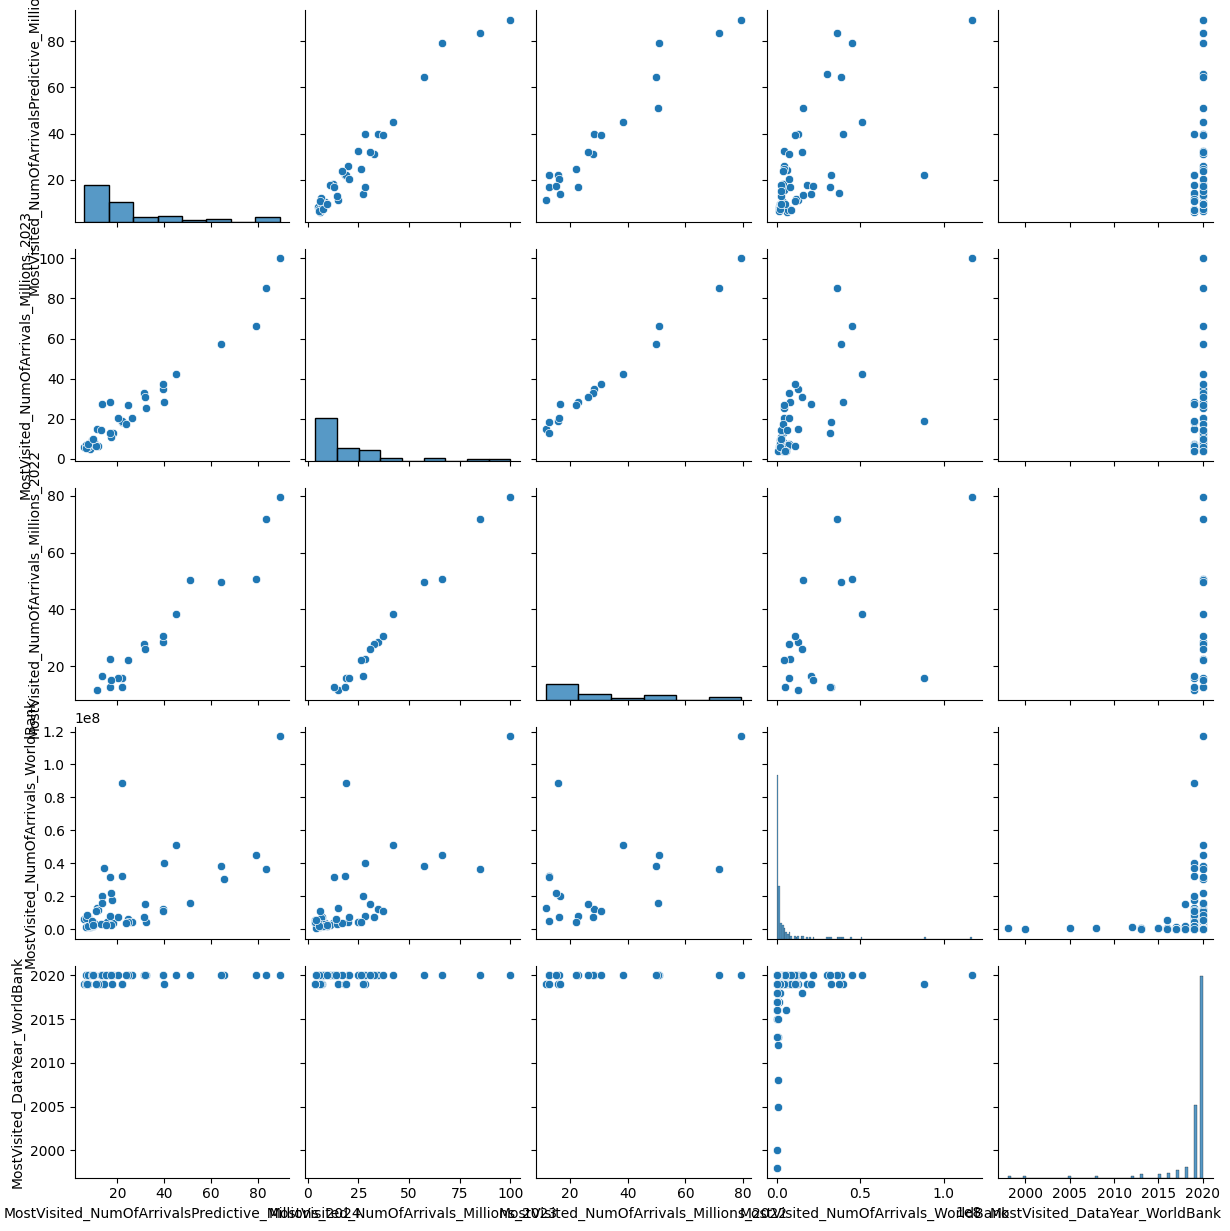

In [9]:
df_numeric = df.select_dtypes(include=[np.number])
sns.pairplot(df_numeric)
plt.show()

In [10]:
df['MostVisited_NumOfArrivalsPredictive_Millions_2024'].fillna(df['MostVisited_NumOfArrivals_Millions_2023'],inplace=True)
df['MostVisited_NumOfArrivals_Millions_2023'].fillna(df['MostVisited_NumOfArrivals_Millions_2022'],inplace=True)

In [11]:
df_info(df)

Data Shape: (203, 6)


,name,dtypes,isnull,% null,num_unique,first_value
0,country,object,0,0.00,203,India
1,MostVisited_NumOfArrivalsPredictive_Millions_2024,float64,141,69.46,58,17.9
2,MostVisited_NumOfArrivals_Millions_2023,float64,151,74.38,50,NaN
3,MostVisited_NumOfArrivals_Millions_2022,float64,183,90.15,20,NaN
4,MostVisited_NumOfArrivals_WorldBank,float64,1,0.49,198,17914000.0
5,MostVisited_DataYear_WorldBank,float64,1,0.49,12,2019.0


In [12]:
if pd.api.types.is_numeric_dtype(df['MostVisited_NumOfArrivals_WorldBank']):
    df['MostVisited_NumOfArrivals_Millions_2022'].fillna(df['MostVisited_NumOfArrivals_WorldBank'],inplace=True)
else:
    # If WorldBank data is not numeric, try converting it first
    try:
        df['MostVisited_NumOfArrivals_WorldBank'] = pd.to_numeric(df['MostVisited_NumOfArrivals_WorldBank'], errors='coerce')
        df['MostVisited_NumOfArrivals_Millions_2022'].fillna(df['MostVisited_NumOfArrivals_WorldBank'],inplace=True)
    except:
        print("Warning: 'MostVisited_NumOfArrivals_WorldBank' could not be converted to numeric, skipping fillna.")

In [13]:
df_info(df)

Data Shape: (203, 6)


,name,dtypes,isnull,% null,num_unique,first_value
0,country,object,0,0.00,203,India
1,MostVisited_NumOfArrivalsPredictive_Millions_2024,float64,141,69.46,58,17.9
2,MostVisited_NumOfArrivals_Millions_2023,float64,151,74.38,50,NaN
3,MostVisited_NumOfArrivals_Millions_2022,float64,1,0.49,198,17914000.0
4,MostVisited_NumOfArrivals_WorldBank,float64,1,0.49,198,17914000.0
5,MostVisited_DataYear_WorldBank,float64,1,0.49,12,2019.0


In [14]:
for col in ['MostVisited_NumOfArrivalsPredictive_Millions_2024', 'MostVisited_NumOfArrivals_Millions_2023', 'MostVisited_NumOfArrivals_Millions_2022']:
    if df[col].isnull().any():
        from sklearn.impute import KNNImputer
        imputer = KNNImputer(n_neighbors=5)
        df[col] = imputer.fit_transform(df[[col]])[:, 0]
        print(f"Filled missing values in '{col}' using KNN imputation.")

Filled missing values in 'MostVisited_NumOfArrivalsPredictive_Millions_2024' using KNN imputation.
Filled missing values in 'MostVisited_NumOfArrivals_Millions_2023' using KNN imputation.
Filled missing values in 'MostVisited_NumOfArrivals_Millions_2022' using KNN imputation.


In [15]:
df['MostVisited_DataYear_WorldBank'] = df['MostVisited_DataYear_WorldBank'].astype('Int64')

In [16]:
df_info(df)

Data Shape: (203, 6)


,name,dtypes,isnull,% null,num_unique,first_value
0,country,object,0,0.00,203,India
1,MostVisited_NumOfArrivalsPredictive_Millions_2024,float64,0,0.00,59,17.9
2,MostVisited_NumOfArrivals_Millions_2023,float64,0,0.00,51,19.628654
3,MostVisited_NumOfArrivals_Millions_2022,float64,0,0.00,199,17914000.0
4,MostVisited_NumOfArrivals_WorldBank,float64,1,0.49,198,17914000.0
5,MostVisited_DataYear_WorldBank,Int64,1,0.49,12,2019


In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Prepare data
X = df[['MostVisited_NumOfArrivals_Millions_2022', 'MostVisited_NumOfArrivals_Millions_2023']]
y = df['MostVisited_NumOfArrivalsPredictive_Millions_2024']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred_lr = model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [19]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svr_model = SVR(kernel='rbf') 
svr_model.fit(X_train, y_train)

y_pred_svr = svr_model.predict(X_test)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

In [21]:
import pandas as pd
from typing import Dict, List, Tuple

def summarize_models(model_metrics):
    summary_df = pd.DataFrame([
        {
            "Model": model_name,
            "MSE": metrics[0],
            "R2 Score": metrics[1]
        }
        for model_name, metrics in model_metrics.items()
    ])

    return summary_df.sort_values("MSE")

In [22]:
metrics = {
    "Linear Regression": (mse_lr, r2_lr),
    "Random Forest": (mse_rf, r2_rf),
    "Support Vector Regression": (mse_svr, r2_svr)
}

summary = summarize_models(metrics)
print(summary)

                       Model        MSE  R2 Score
2  Support Vector Regression  14.664297  0.670536
0          Linear Regression  14.857431  0.666196
1              Random Forest  27.294089  0.386781
